In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plt_conf as conf 

import rutinas as ru
import pandas as pd

from scipy.linalg import solve, norm, eig, eigh
from scipy.optimize import curve_fit, root_scalar
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad


import plt_conf as conf

In [2]:
conf.general()  # cargando configuración general

## configuración trivial

In [3]:
# Resolución de ecuaciones del fondo
nodos, ell = 1, 1 # 2, 9 # 

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)
                                                           #, Nptos=800, Rtol=1e-10, Atol=1e-11)
                                                           #Rtol=1e-11, Atol=1e-12) # no escalada #1500 2500)  # no escalada

Finding a profile with  1 nodes
Maxima precisión alcanzada 0.33783151192188826 radio 32.99436221518425
masa  -10.714976632789813 Uf  -0.3247517428252849

E(U(inf))  -0.053727409224277295
energía =  -0.1583693272407303 $\lambda = $ 0.27998193449879394

Checking normalización,  1.0000000000706648 1


In [4]:
# extendiendo soluciones
Ext = int(200*(nodos+1)*lam-rD[-1])+1 #  (L-r[-1]/lam)lam
Np = int(Ext/5) # 800

#Ext = 7000
#Np = 4800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD, sD, dsD, uD, duD, Ext, Np)

checking  -1.0101388079394344 10.714977040823765 0.296461078084562 -0.1583693272407303


In [5]:
# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

Checking normalización, 1.000000001625521 1
Checking convergencia de la Energía U(inf), U(asint) -0.14336953998568044 -0.1583693272407303


In [6]:
L = 200*(nodos+1)
N = int(L*3/4)
lEnigF1, _, VF1, x1 = ru.espectro(L, N, fsN, fuN, ell)


#Sc = 3. #2. # escala donde quiero los puntos
#lEnigF12, _, VF12, x12 = ru.espectroRN(N, fsN, fuN, Sc, ell)

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

In [7]:
# extrallendo reales

jj = np.real(lEnigF1)!=0
autovec = VF1[:, jj]
autoval = lEnigF1[jj]

#jj2 = np.real(lEnigF12)!=0
#autovec2 = VF12[:, jj]
#autoval2 = lEnigF12[jj]

autoval#, autoval2

array([-0.00619398-0.03340186j, -0.00619398+0.03340186j,
        0.00619398+0.03340186j,  0.00619398-0.03340186j])

In [8]:
# creando dataframe
indic = [0, 1, 2, 3]  #[0, 1, 4, 5]  # [0, 1, 2, 3] 
datAVec = []
lisAVal = []
lisautoval = []
for ii in indic:
    Es0 = autovec[:, ii]
    A0, B0 = Es0[:(N-1)], Es0[(N-1):]
    A0 = np.insert(A0, [0, len(A0)], [0, 0], axis=None)
    B0 = np.insert(B0, [0, len(B0)], [0, 0], axis=None)
    datAVec.append(A0)
    datAVec.append(B0)
    
    lisAVal.append('{0.real:7.5f} + {0.imag:7.5f}i'.format(autoval[ii]))
    lisautoval.append(autoval[ii])

datAVec = np.array(datAVec).T

DatosVect = pd.DataFrame(datAVec, index=pd.Index(x1, name='Chev. ptos.'),
            columns=pd.MultiIndex.from_product([lisAVal,
                                                ['A', 'B']], names=['Autovalor:', 'Autovector:']))
DatosVect

Autovalor:         -0.00619 + -0.03340i                              \
Autovector:                           A                           B   
Chev. ptos.                                                           
 1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j   
 0.999945   -1.858875e-07-2.918090e-07j -3.608845e-07+3.432379e-07j   
 0.999781   -2.973951e-06-4.668597e-06j -5.773731e-06+5.491452e-06j   
 0.999507   -1.505238e-05-2.363061e-05j -2.922455e-05+2.779678e-05j   
 0.999123   -4.755091e-05-7.465786e-05j -9.233264e-05+8.783045e-05j   
...                                 ...                         ...   
-0.999123    1.588562e-14-9.393022e-15j  1.521073e-14-8.596263e-15j   
-0.999507    9.003871e-15-5.159961e-15j  8.623632e-15-4.755785e-15j   
-0.999781    4.017755e-15-2.329740e-15j  3.808748e-15-2.096764e-15j   
-0.999945    1.076443e-15-5.014518e-16j  1.016469e-15-5.883417e-16j   
-1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j   

Autovalor:          -0.00619 + 0.03340i                              \
Autovector:                           A                           B   
Chev. ptos.                                                           
 1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j   
 0.999945    3.084403e-08-3.446089e-07j -4.783163e-07-1.387927e-07j   
 0.999781    4.934434e-07-5.513320e-06j -7.652524e-06-2.220562e-06j   
 0.999507    2.497083e-06-2.790600e-05j -3.873479e-05-1.124060e-05j   
 0.999123    7.884665e-06-8.816302e-05j -1.223835e-04-3.552153e-05j   
...                                 ...                         ...   
-0.999123    9.971755e-16+1.150390e-15j -3.768149e-16-2.324868e-16j   
-0.999507    5.561165e-16+7.878615e-16j -1.894144e-16-2.334137e-16j   
-0.999781    2.161364e-16+3.253206e-16j -1.133920e-16-1.079938e-16j   
-0.999945    2.761177e-17+1.864441e-16j  5.819846e-17+4.897989e-19j   
-1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j   

Autovalor:           0.00619 + 0.03340i                              \
Autovector:                           A                           B   
Chev. ptos.                                                           
 1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j   
 0.999945    3.084403e-08+3.446089e-07j -4.783163e-07+1.387927e-07j   
 0.999781    4.934434e-07+5.513320e-06j -7.652524e-06+2.220562e-06j   
 0.999507    2.497083e-06+2.790600e-05j -3.873479e-05+1.124060e-05j   
 0.999123    7.884665e-06+8.816302e-05j -1.223835e-04+3.552153e-05j   
...                                 ...                         ...   
-0.999123    9.971755e-16-1.150390e-15j -3.768149e-16+2.324868e-16j   
-0.999507    5.561165e-16-7.878615e-16j -1.894144e-16+2.334137e-16j   
-0.999781    2.161364e-16-3.253206e-16j -1.133920e-16+1.079938e-16j   
-0.999945    2.761177e-17-1.864441e-16j  5.819846e-17-4.897989e-19j   
-1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j   

Autovalor:          0.00619 + -0.03340i                              
Autovector:                           A                           B  
Chev. ptos.                                                          
 1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j  
 0.999945   -1.858875e-07+2.918090e-07j -3.608845e-07-3.432379e-07j  
 0.999781   -2.973951e-06+4.668597e-06j -5.773731e-06-5.491452e-06j  
 0.999507   -1.505238e-05+2.363061e-05j -2.922455e-05-2.779678e-05j  
 0.999123   -4.755091e-05+7.465786e-05j -9.233264e-05-8.783045e-05j  
...                                 ...                         ...  
-0.999123    1.588562e-14+9.393022e-15j  1.521073e-14+8.596263e-15j  
-0.999507    9.003871e-15+5.159961e-15j  8.623632e-15+4.755785e-15j  
-0.999781    4.017755e-15+2.329740e-15j  3.808748e-15+2.096764e-15j  
-0.999945    1.076443e-15+5.014518e-16j  1.016469e-15+5.883417e-16j  
-1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j  

[301 rows x 8 columns]

In [9]:
# Asignando auto-vectores
def conv(elem):
    """ 
    """
    idx = pd.IndexSlice
    A = np.array(elem.loc[:, idx[:,'A']]).T[0]
    B = np.array(elem.loc[:,idx[:,'B']]).T[0]
    return A, B

# separando
nLam = 4 # 2
datos = [DatosVect[[lisAVal[i]]] for i in range(nLam)]
[A1, B1], [A2, B2], [A3, B3], [A4, B4] = np.array(list(map(conv, datos)))
#[A1, B1], [A2, B2] = np.array(list(map(conv, datos)))


# pasando a distancias reales
rad = np.array([(-x1[i]+1)*L/2. for i in range(N+1)])

#datos

In [10]:
lisautoval

[(-0.00619398137861738-0.03340185626072386j),
 (-0.006193981378598284+0.03340185626072526j),
 (0.006193981378598284+0.033401856260725254j),
 (0.006193981378617381-0.03340185626072385j)]

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_6918/3988434410.py:1: RuntimeWarning: invalid value encountered in divide
  datA = [A1/rad, A2/rad, A3/rad, A4/rad]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_6918/3988434410.py:2: RuntimeWarning: invalid value encountered in divide
  datB = [B1/rad, B2/rad, B3/rad, B4/rad]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_6918/3988434410.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_6918/3988434410.py:46: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_6918/3988434410.py:64: UserWarning: cmr10 font should ideally be used w

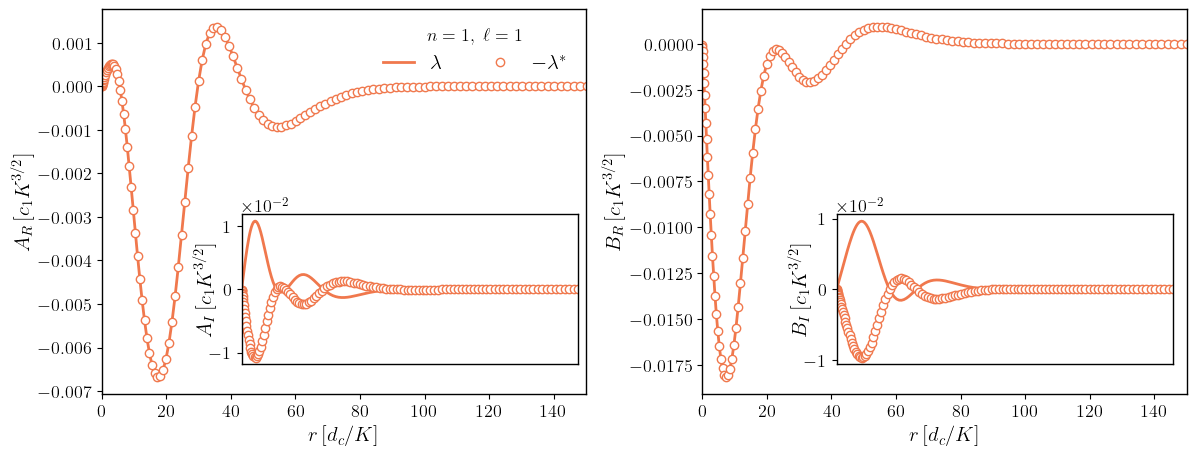

In [11]:
datA = [A1/rad, A2/rad, A3/rad, A4/rad]
datB = [B1/rad, B2/rad, B3/rad, B4/rad]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0., wspace=.24) # espacio vertical y horizontal entre los subplots
                      ) 

ax[0].plot(rad, np.real(datA[2]), '-', color = '#f0784d',
               label = r'$\lambda$')  

#print('{0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[2]))

ax[0].plot(rad, np.real(datA[1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'$-\lambda^*$') # = {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[1])


    
ax[1].plot(rad, np.real(datB[2]), '-', color = '#f0784d',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[2]))
ax[1].plot(rad, np.real(datB[1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[1]))
    
    
ax[0].set_xlabel(r'$r\,[d_c/K]$')
ax[0].set_ylabel(r'$A_R \, [c_1 K^{3/2}]$')
ax[1].set_xlabel(r'$r\,[d_c/K]$')
ax[1].set_ylabel(r'$B_R \, [c_1 K^{3/2}]$')

ax[0].set_xlim([0, 150])
ax[1].set_xlim([0, 150])
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

ax[0].legend(loc='best', frameon=False, ncols=2, title=r'$n=1, \; \ell=1$')
#ax[1].legend(loc='best', frameon=False)

#ax[0].text(x=20,y=0.0028, s=r'$\ell=1$')
#ax[0].text(x=20,y=0.0022, s=r'one-node')
#ax[1].text(x=-0.037,y=0.003, s=r'one-node')


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.225, 0.17, 0.24, 0.3]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax1.plot(rad, np.imag(datA[2]), '-', color = '#f0784d',
               label = r'  $\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[2]))
ax1.plot(rad[::1], np.imag(datA[1][::1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[1]))

# límites
ax1.set_xlim(0, 150)
#ax1.set_ylim(0, 1)
ax1.set_ylabel(r'$A_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax1.set_xticks([]);


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.65, 0.17, 0.24, 0.3]  # posición y dimensiones del insert
ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax2.plot(rad, np.imag(datB[2]), '-', color = '#f0784d',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[2]))
ax2.plot(rad[::1], np.imag(datB[1][::1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[1]))

# límites
ax2.set_xlim(0, 150)
#ax1.set_ylim(0, 1)
ax2.set_ylabel(r'$B_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax2.set_xticks([]);


In [12]:
fig.savefig('funEng.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [ ]:
# convergencia

In [8]:
# checking einge-function convergence
def conv(elem):
    """ 
    """
    idx = pd.IndexSlice
    A = np.array(elem.loc[:, idx[:,'A']]).T[0]
    B = np.array(elem.loc[:,idx[:,'B']]).T[0]
    return A, B

# convergencia variando N con LL fijo
LL = 200
Nmin = 100
Nmax = 200
Npunt = 5
Nval = np.linspace(Nmin, Nmax, Npunt, dtype=np.int32)

colum_data = []
for i in Nval:
    lEnigF1, _, VF1, x1 = ru.espectro(LL, i, fsN, fuN, ell)
    
    jj = np.real(lEnigF1)!=0
    autovec = VF1[:, jj]
    autoval = lEnigF1[jj]
    
    
    indic = [0, 1, 2, 3]  #[0, 1, 4, 5]  # [0, 1, 2, 3] 
    datAVec = []
    lisAVal = []
    lisautoval = []
    for ii in indic:
        Es0 = autovec[:, ii]
        A0, B0 = Es0[:(i-1)], Es0[(i-1):]
        A0 = np.insert(A0, [0, len(A0)], [0, 0], axis=None)
        B0 = np.insert(B0, [0, len(B0)], [0, 0], axis=None)
        datAVec.append(A0)
        datAVec.append(B0)
    
        lisAVal.append('{0.real:7.5f} + {0.imag:7.5f}i'.format(autoval[ii]))
        lisautoval.append(autoval[ii])

    datAVec = np.array(datAVec).T

    DatosVect = pd.DataFrame(datAVec, index=pd.Index(x1, name='Chev. ptos.'),
                columns=pd.MultiIndex.from_product([lisAVal,
                                                ['A', 'B']], names=['Autovalor:', 'Autovector:']))
    
    # separando
    nLam = 4 # 2
    datos = [DatosVect[[lisAVal[j]]] for j in range(nLam)]
    [A1, B1], [A2, B2], [A3, B3], [A4, B4] = np.array(list(map(conv, datos)))
    #[A1, B1], [A2, B2] = np.array(list(map(conv, datos)))

    # pasando a distancias reales
    rad = np.array([(-x1[j]+1)*LL/2. for j in range(i+1)])
    
    datA = [A1/rad, A2/rad, A3/rad, A4/rad]
    datB = [B1/rad, B2/rad, B3/rad, B4/rad]
    
    datos =[datA, datB]

    # salvando
    
    colum_data.append([i, rad, datos])

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


<ipython-input-8-f1a95013900a>:56: RuntimeWarning: invalid value encountered in true_divide
  datA = [A1/rad, A2/rad, A3/rad, A4/rad]
<ipython-input-8-f1a95013900a>:57: RuntimeWarning: invalid value encountered in true_divide
  datB = [B1/rad, B2/rad, B3/rad, B4/rad]


Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  Tr

Text(0.5, 0.98, 'Parte real Autovector')

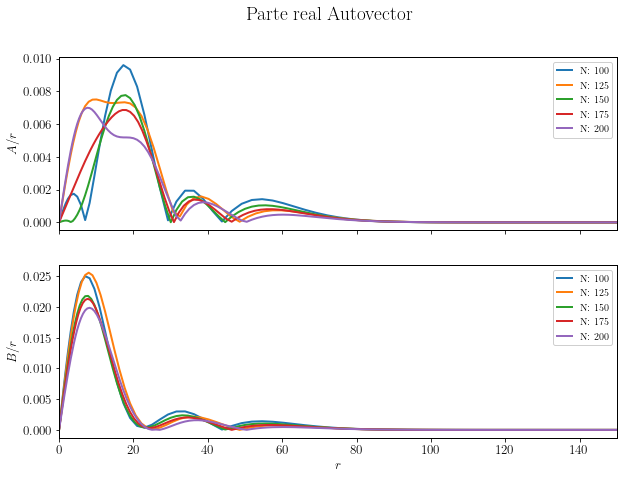

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(10,7),
                       gridspec_kw={'wspace':0.07, 'hspace':0.2})
    
for i in range(len(Nval)):
    N, rad, datA, datB = colum_data[i][0], colum_data[i][1], colum_data[i][2][0], colum_data[i][2][1]

    for j in [0]:#range(1):
    
        ax[0].plot(rad, np.abs(np.real(datA[j])), '-', #color = 'red', alpha = N/100,
               label = r'N: {0.real:5d}'.format(N))
    
        ax[1].plot(rad, np.abs(np.real(datB[j])), '-', #color = 'blue', alpha = N/100,
               label = r'N: {0.real:5d}'.format(N))

    
    
#ax[0].set_xlabel(r'$r$', fontsize=13)
ax[0].set_ylabel(r'$A/r$', fontsize=13)
ax[1].set_xlabel(r'$r$', fontsize=13)
ax[1].set_ylabel(r'$B/r$', fontsize=13)

ax[0].set_xlim([0, 150])
ax[1].set_xlim([0, 150])
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

ax[0].legend(loc='best', frameon=True, fontsize=10)
ax[1].legend(loc='best', frameon=True, fontsize=10)

fig.suptitle('Parte real Autovector')

Text(0.5, 0.98, 'Parte real Autovector')

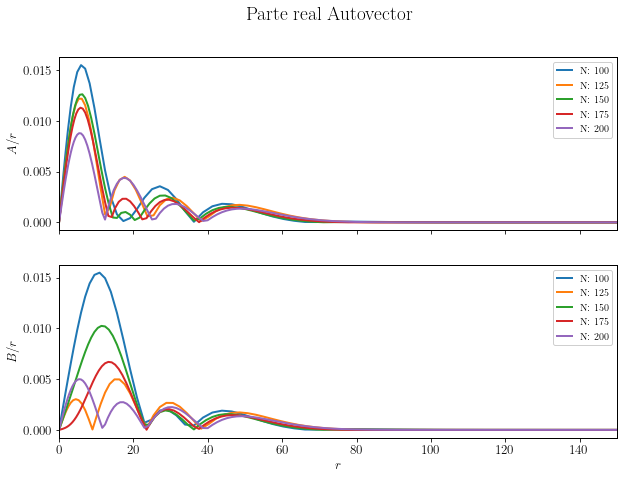

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(10,7),
                       gridspec_kw={'wspace':0.07, 'hspace':0.2})
    
for i in range(len(Nval)):
    N, rad, datA, datB = colum_data[i][0], colum_data[i][1], colum_data[i][2][0], colum_data[i][2][1]

    for j in [0]:#range(1):
    
        ax[0].plot(rad, np.abs(np.imag(datA[j])), '-', #color = 'red', alpha = N/100,
               label = r'N: {0.real:5d}'.format(N))
    
        ax[1].plot(rad, np.abs(np.imag(datB[j])), '-', #color = 'blue', alpha = N/100,
               label = r'N: {0.real:5d}'.format(N))

    
    
#ax[0].set_xlabel(r'$r$', fontsize=13)
ax[0].set_ylabel(r'$A/r$', fontsize=13)
ax[1].set_xlabel(r'$r$', fontsize=13)
ax[1].set_ylabel(r'$B/r$', fontsize=13)

ax[0].set_xlim([0, 150])
ax[1].set_xlim([0, 150])
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

ax[0].legend(loc='best', frameon=True, fontsize=10)
ax[1].legend(loc='best', frameon=True, fontsize=10)

fig.suptitle('Parte real Autovector')

In [15]:
# otros

<ipython-input-60-1bf1fad51e86>:1: RuntimeWarning: invalid value encountered in true_divide
  datA = [A1/rad, A2/rad, A3/rad, A4/rad]
<ipython-input-60-1bf1fad51e86>:2: RuntimeWarning: invalid value encountered in true_divide
  datB = [B1/rad, B2/rad, B3/rad, B4/rad]


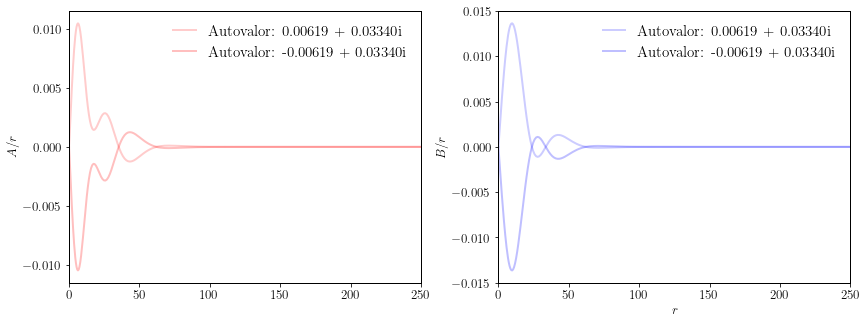

In [60]:
datA = [A1/rad, A2/rad, A3/rad, A4/rad]
datB = [B1/rad, B2/rad, B3/rad, B4/rad]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0., wspace=.22) # espacio vertical y horizontal entre los subplots
                      ) 

ax[0].plot(rad, np.imag(datA[2]), '-', color = 'red', alpha = abs(1/(5-0)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[2]))
ax[0].plot(rad, np.imag(datA[1]), '-', color = 'red', alpha = abs(1/(5-1)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[1]))


    
ax[1].plot(rad, np.imag(datB[2]), '-', color = 'blue', alpha = abs(1/(5-0)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[2]))
ax[1].plot(rad, np.imag(datB[1]), '-', color = 'blue', alpha = abs(1/(5-1)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[1]))
    
    
#ax[0].set_xlabel(r'$r$', fontsize=13)
ax[0].set_ylabel(r'$A/r$', fontsize=13)
ax[1].set_xlabel(r'$r$', fontsize=13)
ax[1].set_ylabel(r'$B/r$', fontsize=13)

ax[0].set_xlim([0, 250])
ax[1].set_xlim([0, 250])
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

ax[0].legend(loc='best', frameon=False)
ax[1].legend(loc='best', frameon=False)

#fig.suptitle('Parte real Autovector')



<ipython-input-18-890082df15ff>:1: RuntimeWarning: invalid value encountered in true_divide
  datA = [A1/rad, A2/rad, A3/rad, A4/rad]
<ipython-input-18-890082df15ff>:2: RuntimeWarning: invalid value encountered in true_divide
  datB = [B1/rad, B2/rad, B3/rad, B4/rad]


Text(0.5, 0.98, 'Parte real Autovector')

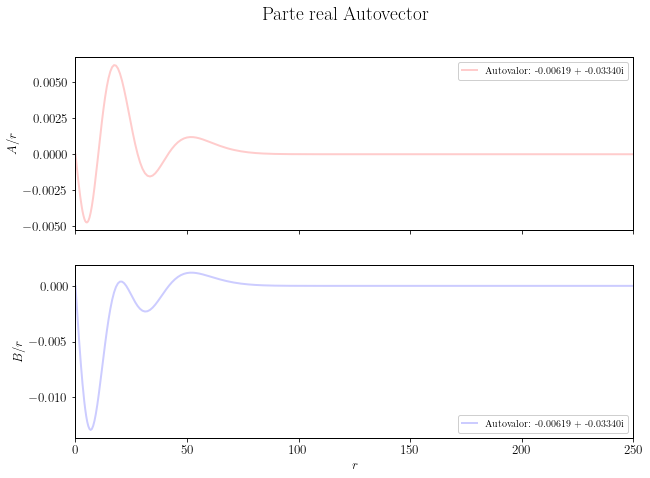

In [18]:
datA = [A1/rad, A2/rad, A3/rad, A4/rad]
datB = [B1/rad, B2/rad, B3/rad, B4/rad]

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(10,7),
                       gridspec_kw={'wspace':0.07, 'hspace':0.2})

for i in [0]:#range(1):
    
    ax[0].plot(rad, np.real(datA[i]), '-', color = 'red', alpha = abs(1/(5-i)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[i]))
    
    ax[1].plot(rad, np.real(datB[i]), '-', color = 'blue', alpha = abs(1/(5-i)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[i]))
    
    
#ax[0].set_xlabel(r'$r$', fontsize=13)
ax[0].set_ylabel(r'$A/r$', fontsize=13)
ax[1].set_xlabel(r'$r$', fontsize=13)
ax[1].set_ylabel(r'$B/r$', fontsize=13)

ax[0].set_xlim([0, 250])
ax[1].set_xlim([0, 250])
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

ax[0].legend(loc='best', frameon=True, fontsize=10)
ax[1].legend(loc='best', frameon=True, fontsize=10)

fig.suptitle('Parte real Autovector')



In [ ]:
rval = lambda x, Sc: 2*Sc*(1/(1-x)-1/2)
#xval = np.array([rval(x12[i], Sc) for i in range(N+1)])

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(10,7),
                       gridspec_kw={'wspace':0.07, 'hspace':0.2})

ax[0].plot(xval[1:-1], -np.real(A0)/xval[1:-1], '--', color = 'red', label = r'n=1')

ax[1].plot(xval[1:-1], -np.real(B0)/xval[1:-1], '--', color = 'blue', label = r'Sin pared')

ax[0].set_xlabel(r'$r$', fontsize=13)
ax[0].set_ylabel(r'$A/r$', fontsize=13)
ax[1].set_xlabel(r'$r$', fontsize=13)
ax[1].set_ylabel(r'$B/r$', fontsize=13)

ax[0].set_xlim([0, 140])
ax[1].set_xlim([0, 140])
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

#ax[0].legend(loc='best', frameon=True, fontsize=10)
#ax[1].legend(loc='best', frameon=True, fontsize=10)

ax[0].plot(rad, np.real(datA[i]), '-', color = 'red', alpha = abs(1/(5-i)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[i]))

ax[1].plot(rad, np.real(datB[i]), '-', color = 'blue', alpha = abs(1/(5-i)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[i]))



fig.suptitle('Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(autoval[ii]))

<ipython-input-25-03528e72c6c7>:1: RuntimeWarning: divide by zero encountered in double_scalars
  rval = lambda x, Sc: 2*Sc*(1/(1-x)-1/2)


Text(0.5, 0.98, 'Autovalor: -0.00619 + -0.03340i')

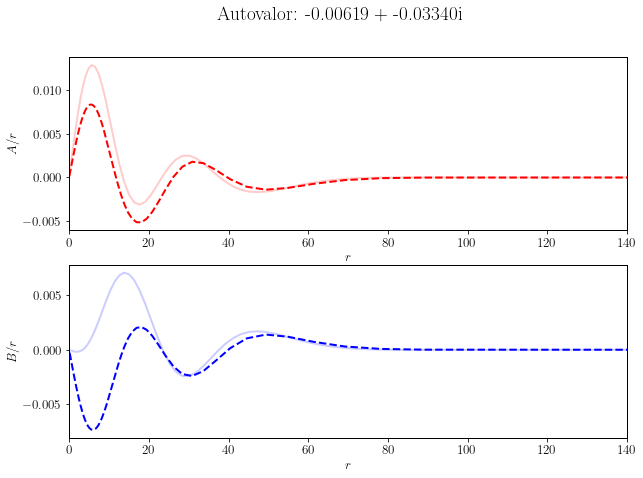

In [25]:
rval = lambda x, Sc: 2*Sc*(1/(1-x)-1/2)
xval = np.array([rval(x12[i], Sc) for i in range(N+1)])

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(10,7),
                       gridspec_kw={'wspace':0.07, 'hspace':0.2})

ax[0].plot(xval[1:-1], -np.imag(A0)/xval[1:-1], '--', color = 'red', label = r'n=1')

ax[1].plot(xval[1:-1], -np.imag(B0)/xval[1:-1], '--', color = 'blue', label = r'Sin pared')

ax[0].set_xlabel(r'$r$', fontsize=13)
ax[0].set_ylabel(r'$A/r$', fontsize=13)
ax[1].set_xlabel(r'$r$', fontsize=13)
ax[1].set_ylabel(r'$B/r$', fontsize=13)

ax[0].set_xlim([0, 140])
ax[1].set_xlim([0, 140])
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

#ax[0].legend(loc='best', frameon=True, fontsize=10)
#ax[1].legend(loc='best', frameon=True, fontsize=10)

ax[0].plot(rad, np.imag(datA[i]), '-', color = 'red', alpha = abs(1/(5-i)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[i]))

ax[1].plot(rad, np.imag(datB[i]), '-', color = 'blue', alpha = abs(1/(5-i)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[i]))



fig.suptitle('Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(autoval[ii]))